# Creating Project

In [1]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import mitzu.model as M


p = M.Project(
        event_data_tables=[
            M.EventDataTable.create(
                table_name="page_events",
                event_name_field="event_name",
                event_time_field="event_time",
                user_id_field="user_id",
            ),
            M.EventDataTable.create(
                table_name="search_events",
                event_name_field="event_name",
                event_time_field="event_time",
                user_id_field="user_id",
            ),
        ],
        discovery_settings=M.DiscoverySettings(
            end_dt=datetime(2021, 4, 1),
            lookback_days=84,
            property_sample_rate=100,
        ),
        connection=M.Connection(
            connection_type=M.ConnectionType.POSTGRESQL,
            user_name="test",
            secret_resolver=M.ConstSecretResolver("test"),
            host="localhost",
        ),
    )


# Saving Project to File

In [2]:
dp = p.discover_project()
res = dp.save_to_project_file("postgres_test_project")

Successfully finished dataset discovery.                                                                                                                                                                                                                                  


# Loading Project

In [3]:
dp = M.DiscoveredProject.load_from_project_file("postgres_test_project")
m = dp.create_notebook_class_model()

# Product Analytics From Loaded Project

In [4]:
(m.page_visit >> m.search).config(conv_window="7 days",time_group="total",group_by=m.page_visit.domain).print_sql()

WITH anon_1 AS
  (SELECT page_events.user_id AS _cte_user_id,
          page_events.event_time AS _cte_datetime,
          page_events.domain AS _cte_group
   FROM page_events
   WHERE page_events.event_name = 'page_visit'
     AND TRUE),
     anon_2 AS
  (SELECT search_events.user_id AS _cte_user_id,
          search_events.event_time AS _cte_datetime,
          NULL AS _cte_group
   FROM search_events
   WHERE search_events.event_name = 'search'
     AND TRUE)
SELECT NULL AS _datetime,
       anon_1._cte_group AS _group,
       count(DISTINCT anon_1._cte_user_id) AS _user_count_1,
       (count(DISTINCT anon_1._cte_user_id) * 100.0) / count(DISTINCT anon_1._cte_user_id) AS _agg_value_1,
       count(DISTINCT anon_2._cte_user_id) AS _user_count_2,
       (count(DISTINCT anon_2._cte_user_id) * 100.0) / count(DISTINCT anon_1._cte_user_id) AS _agg_value_2
FROM anon_1
LEFT OUTER JOIN anon_2 ON anon_1._cte_user_id = anon_2._cte_user_id
AND anon_2._cte_datetime > anon_1._cte_datetime
AND an

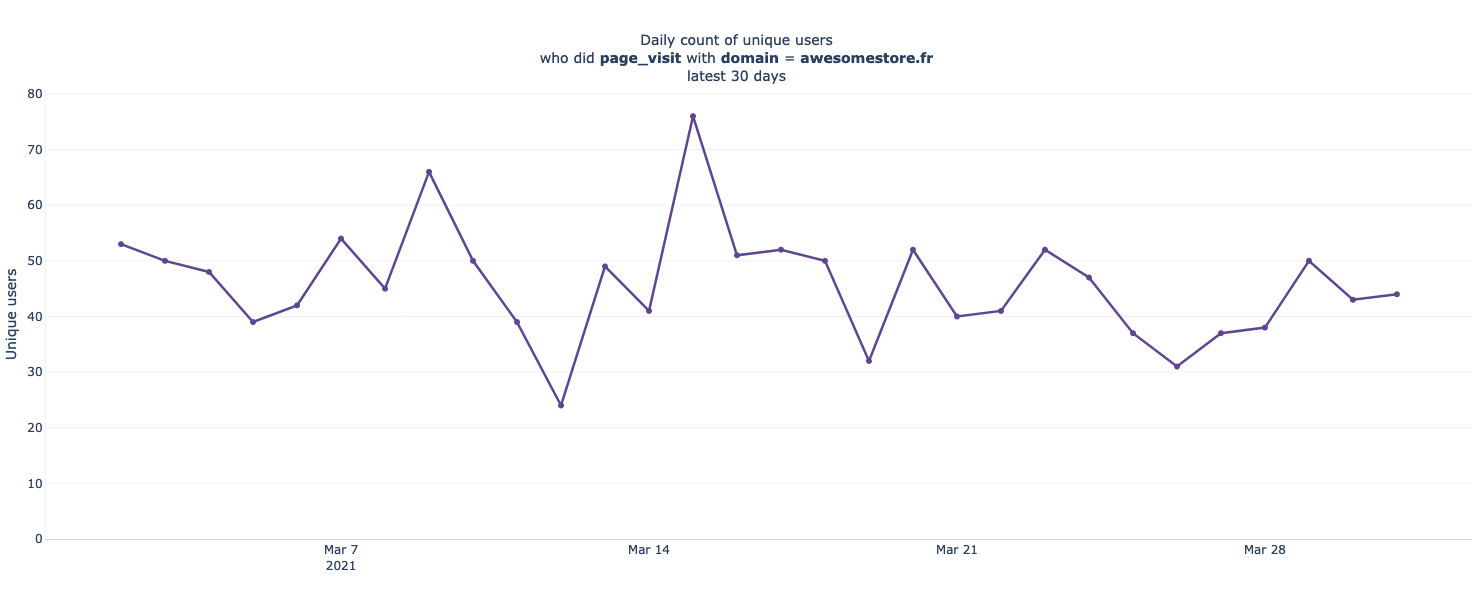

In [12]:
m.page_visit.domain.is_awesomestore_fr

In [ ]:
(m.search >> m.page_visit).config(time_group="total", 
                                    conv_window="3 week", 
                                    group_by=m.page_visit.user_country_code, 
                                    lookback_days=120)

In [ ]:
(m.search >> m.page_visit).config(time_group="total", 
                                    conv_window="3 week", 
                                    group_by=m.page_visit.user_country_code, 
                                    lookback_days=120).print_sql()

In [ ]:
dp.display_inline_dashboard(port=8083)

# or when your notebook does not support iframes
# dp.display_external_dashboard(port=8083)